C 편의점, 거리: 11.704699910719626
B 편의점, 거리: 25.709920264364882
E 편의점, 거리: 34.785054261852174
J 편의점, 거리: 45.5411901469428
G 편의점, 거리: 61.0
D 편의점, 거리: 94.847245611035
F 편의점, 거리: 95.1892851112981
A 편의점, 거리: 99.62429422585637
H 편의점, 거리: 109.27488274987991
I 편의점, 거리: 115.52056094046635



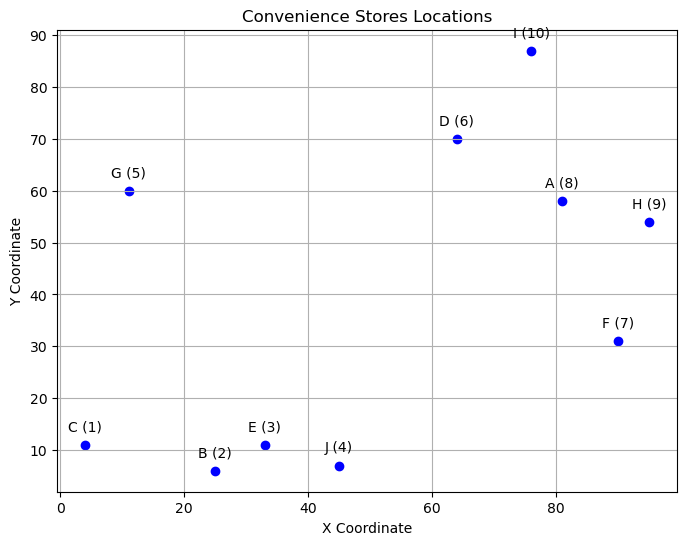

프로그램 실행 시간: 0.14385771751403809 초


In [16]:
import random
import math
import time
import matplotlib.pyplot as plt

class Node():
    def __init__(self, store):
        if len(store) != 3:
            raise ValueError("Store data must contain name, x-coordinate, and y-coordinate.")
        self.data = store
        self.next = None

def make_store_list(store):
    global head

    node = Node(store)

    if head is None:
        head = node
        head.next = head
        return

    current = head

    node_x, node_y = node.data[1:]
    node_dist = node_x * node_x + node_y * node_y
    head_x, head_y = head.data[1:]
    head_dist = head_x * head_x + head_y * head_y

    if head_dist > node_dist:
        node.next = head
        last = head
        while last.next != head:
            last = last.next
        last.next = node
        head = node
        return

    while current.next != head:
        next_node = current.next
        next_x, next_y = next_node.data[1:]
        next_dist = next_x * next_x + next_y * next_y
        if next_dist > node_dist:
            break
        current = next_node

    node.next = current.next
    current.next = node

def print_stores():
    current = head
    if current is None:
        print("No stores available.")
        return

    while True:
        x, y = current.data[1:]
        print(current.data[0], '편의점, 거리:', math.sqrt(x * x + y * y))
        current = current.next
        if current == head:
            break
    print()

if __name__ == "__main__":

    start_time = time.time()

    head = None
    store_array = []
    store_name = 'A'

    for _ in range(10):
        store = (store_name, random.randint(1, 100), random.randint(1, 100))
        store_array.append(store)
        store_name = chr(ord(store_name) + 1)

    for store in store_array:
        make_store_list(store)

    print_stores()

    x_values = [store[1] for store in store_array]
    y_values = [store[2] for store in store_array]
    store_names = [store[0] for store in store_array]

    distances = [x ** 2 + y ** 2 for x, y in zip(x_values, y_values)]
    sorted_indexes = sorted(range(len(distances)), key=lambda k: distances[k])

    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, color='blue', marker='o')
    for i, idx in enumerate(sorted_indexes):
        store_idx = i + 1
        plt.annotate(f'{store_names[idx]} ({store_idx})', (x_values[idx], y_values[idx]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.title('Convenience Stores Locations')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

    end_time = time.time()
    execution_time = end_time - start_time
    print("프로그램 실행 시간:", execution_time, "초")
